In [1]:
from qiskit import QuantumCircuit
from qiskit import Aer, transpile
from qiskit.quantum_info import Statevector
from qiskit import QuantumCircuit, execute, Aer, IBMQ, QuantumRegister
from qiskit.providers.aer import QasmSimulator, StatevectorSimulator, UnitarySimulator
from qiskit.compiler import transpile, assemble
from qiskit.tools.monitor import job_monitor
from qiskit.tools.visualization import plot_histogram, plot_state_city
import qiskit.quantum_info as qi
import numpy as np
from numpy.linalg import inv
from scipy.linalg import expm

In [2]:
sigma_X = np.matrix([[0, 1],
                     [1, 0]])

sigma_Y = np.matrix([[0, -1j],
                     [1j, 0]])


sigma_Z = np.matrix([[1, 0],
                     [0, -1]])

# U(theta) = exp(-i * theta/2 * sigma_x)
def U(theta):
     return expm(-1j*(theta/2)*sigma_X)

In [3]:
vec = np.zeros(2)
vec[0] = 1
vec[1] = 0
ket_zero = Statevector(vec, dims=(2,))
initial_psi = ket_zero  
theta = np.pi
def Psi_Tilde(initial_psi,theta):
    # Expectation value of pauli_y.
    circ = QuantumCircuit(1)
    circ.set_statevector(initial_psi)
    circ.unitary(U(theta),0)
    circ.save_state()

    # Transpile for simulator
    simulator = Aer.get_backend('aer_simulator')
    circ = transpile(circ, simulator)

    result = simulator.run(circ).result()
    return result.data(0)['statevector']
  
Psi_Tilde(ket_zero,np.pi)

Statevector([0.+0.j, 0.-1.j],
            dims=(2,))


In [4]:
def Exp_Sigma_Y(initial_psi,theta):
    # Expectation value of pauli_y.
    circ = QuantumCircuit(1)
    circ.set_statevector(initial_psi)
    circ.unitary(U(theta),0)
    circ.y(0)
    circ.save_state()
    
    # Transpile for simulator
    simulator = Aer.get_backend('aer_simulator')
    circ = transpile(circ, simulator)

    result = simulator.run(circ).result()
    return result.data(0)['statevector']   
Exp_Sigma_Y(ket_zero,np.pi)

Statevector([1.+0.j, 0.-0.j],
            dims=(2,))


In [5]:
def Exp_Sigma_Z(initial_psi,theta):
    # Expectation value of pauli_z.
    circ_1 = QuantumCircuit(1)
    circ_1.set_statevector(initial_psi)
    circ_1.unitary(U(theta),0)
    circ_1.z(0)
    #circ.unitary(sigma_Z,0)
    circ_1.save_state()
    
    #circ_1.measure_all()
    # Transpile for simulator
    simulator = Aer.get_backend('aer_simulator')
    circ_1 = transpile(circ_1, simulator)

    result = simulator.run(circ_1).result()
    return 1j*result.data(0)['statevector']  # Brute force multiplication of i.
Exp_Sigma_Z(ket_zero,np.pi)

Statevector([0.+6.123234e-17j, 0.+1.000000e+00j],
            dims=(2,))


In [6]:
def Inner_Product(Statevector_1,Statevector_2):
    
    v_1 = (np.matrix([[Statevector_1[0]],[Statevector_1[1]]])).getH()
    v_2 = np.matrix([[Statevector_2[0]],[Statevector_2[1]]])
    
    return np.matmul(v_1,v_2)[0,0]

In [7]:
Inner_Product(Psi_Tilde(ket_zero,np.pi),Exp_Sigma_Y(ket_zero,np.pi))

0j

In [8]:
Inner_Product(Psi_Tilde(ket_zero,np.pi),Exp_Sigma_Z(ket_zero,np.pi))

(-1+0j)

In [25]:
#f = open('QAAS_data'+'.txt', 'w')

# Initial values.
alpha = 1
theta = np.pi

alpha_s = []
theta_s = []

psi = ket_zero
Prob = []

t = 0
dt = 0.15
T = []
while t < 8:
    alpha_dot = -(alpha/2) * Inner_Product(Psi_Tilde(psi,theta),Exp_Sigma_Y(psi,theta))
    theta_dot = 2+Inner_Product(Psi_Tilde(psi,theta),Exp_Sigma_Z(psi,theta))
    psi = Psi_Tilde(psi,theta) # new psi.
    
    #print(alpha, alpha_dot)

    #print(theta, theta_dot)
    
    alpha = alpha + (dt * alpha_dot)
    theta = theta + (dt * theta_dot)
    alpha = alpha.real
    theta = theta.real

    alpha_s.append(alpha)
    theta_s.append(theta)
    Prob.append((Inner_Product(Psi_Tilde(psi,theta),Psi_Tilde(psi,theta))).real)
    #f = open('QAAS_data'+'.txt', 'a')
    #f.write(str(t)+ '\t' + str(alpha) + '\t' + str(theta) + '\t' + str(psi[0,0]) + '\t' + str(psi[1,0]) +'\n')
    t += dt
    T.append(t)
    #print(t)
    #print(alpha)
    #print(theta)

In [10]:
import matplotlib.pyplot as plt

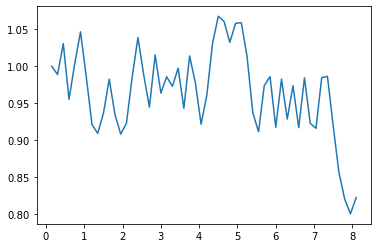

In [27]:
plt.plot(T,alpha_s)
plt.show()

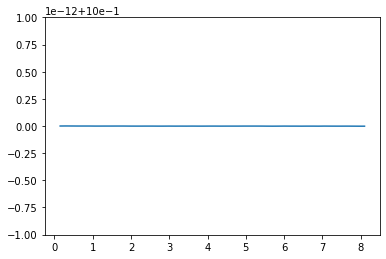

In [26]:
plt.plot(T,Prob)
plt.show()

In [19]:
Prob

[-0.07492970727274226,
 -0.9553364891256062,
 0.6248973167276992,
 0.3623577544766747,
 -0.9540857816096942,
 0.9040721420170602,
 -0.5084702834699674,
 0.08749898343944379,
 0.2066847319005266,
 -0.34663531783502943,
 0.3426892214100688,
 -0.19432990645534082,
 -0.10841586764961497,
 0.5335843865891119,
 -0.9195904329140482,
 0.9392203466968736,
 -0.3109083277018719,
 -0.6728503883183373,
 0.9317975062952214,
 0.15425144988757164,
 -0.9961061032137871,
 -0.17084230974764048,
 0.9190662104975034,
 0.7092961252257233,
 -0.24632812416515942,
 -0.9070732493296086,
 -0.9544839839472232,
 -0.6292096416028825,
 -0.24075817524847465,
 0.04422762066183575,
 0.18063401568318443,
 0.1682164076740593,
 0.00640894945959028,
 -0.30143950709606676,
 -0.6952826214333554,
 -0.9821225956675315,
 -0.8401488248441902,
 -0.08484442450504576,
 0.8291941641788956,
 0.8141809705265292,
 -0.399795616658362,
 -0.9383022612367525,
 0.4303885964878259,
 0.7733183336235158,
 -0.8812746956992806,
 0.04955069454626